<a href="https://colab.research.google.com/github/rmperez556/CD_databits/blob/main/04_Proyecto_final_Fase_4_Roberto_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-header-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>



# <center>  Proyecto Final - Fase 4  </center>

## Descripción
- En esta sección construiremos 3 redes neuronales profundas para un problema de clasificación.
- Trabajeremos con las librerías Tensorflow y Keras.
  
<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/icons/danger.png"/> **Disclaimer:** Este material ha sido preparado por el equipo de **handytec Academy®**. Se prohibe la publicación o reproducción de este material sin previa autorización de **handytec Academy®** - 2022 Todos los derechos reservados.

## Problema de negocio

Un problema imperante en el entorno bancario a nivel global se enfoca en el riesgo crediticio o riesgo de impago. 
  
Este aspecto hace refencia a las pérdidas que incurren los bancos dado que los prestamistas son incapaces de devolver los créditos otorgados. 

Lo cual conlleva la siguiente pregunta: **¿Cómo poder reducir el número de personas que caen en mora crediticia?** 
  
Aspecto que se aborda a continuación.

## Objetivos del proyecto

El objetivo de este proyecto es construir un modelo que los prestatarios puedan usar para ayudar a tomar las mejores decisiones financieras.

Mediante el uso de diferentes algoritmos se obtendrá la probabilidad de impago en cada individuo. El principal indicador que se va usar para ver la bonanza de los distintos modelos va a ser el AUC (Area Under the Curve) generado por las curvas ROC.

## Importar librerías y verificar versiones

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print('** Versiones Actuales                     | Requeridas **')
print('Python:\nVersion Actual:', sys.version, ' | Requerida >= 3.6')
print('NumPy:\nVersion Actual: {:10}             | Requerida >= 1.16.2'.format(np.__version__))
print('Pandas:\nVersion Actual: {:10}            | Requerida >= 0.24.2'.format(pd.__version__))
print('Scikit-learn:\nVersion Actual: {:10}      | Requerida >= 1.2.1'.format(sk.__version__))
print('Matplotlib:\nVersion Actual: {:10}        | Requerida >= 3.0.3'.format(matplotlib.__version__))
print('Seaborn:\nVersion Actual: {:10}           |Requerida >= 0.9.0 '.format(sns.__version__))

** Versiones Actuales                     | Requeridas **
Python:
Version Actual: 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]  | Requerida >= 3.6
NumPy:
Version Actual: 1.21.6                 | Requerida >= 1.16.2
Pandas:
Version Actual: 1.3.5                 | Requerida >= 0.24.2
Scikit-learn:
Version Actual: 1.0.2           | Requerida >= 1.2.1
Matplotlib:
Version Actual: 3.2.2             | Requerida >= 3.0.3
Seaborn:
Version Actual: 0.11.2               |Requerida >= 0.9.0 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

## Descripción de las variables contenidas en el _dataset_

El _dataset_ usado proviene de la plataforma **Kaggle**, y se encuentra separado en dos partes. 

La primera parte contiene los datos que serán usados para el entrenamiento del modelo, que serán nombrados como *datos_training*. La segunda parte son los datos que se usarán para el test del modelo *datos_test*. Estas muestras contienen 150.000 y 101.503 registros, respectivamente (aunque existen algunos campos que tienen distintos valores ausentes). 

Accesso a la Competencia **Give Me Some Credit:** [Link de acceso](https://www.kaggle.com/c/GiveMeSomeCredit/overview)

Link de descarga correspondiente a cada dataset: 
* [training data](https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/Proyecto%20Final/cs-training.csv)
* [test data](https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/Proyecto%20Final/cs-test.csv)

* **SeriousDlqin2yrs:** Persona que tiene 90 días de morosidad vencida o peor (Si = 1 y  No = 0)
* **RevolvingUtilizationOfUnsecuredLines:** El saldo total en tarjetas de crédito y líneas de crédito personales (excepto bienes inmuebles y sin deuda a plazos) sobre la suma de los límites de crédito
* **Age:** Edad prestamista en años 
* **NumberOfTime30-59DaysPastDueNotWorse:** Número de veces que el prestatario ha caido en mora entre 30 y 59 días, pero no ha empeorado en los últimos 2 años 
* **DebtRatio:** Pagos mensuales de deuda sobre el ingreso bruto mensual 
* **MonthlyIncome:** Ingreso mensual 
* **NumberOfOpenCreditLinesAndLoans:** Número de préstamos abiertos (cuotas como préstamos para automóviles o hipotecas) y líneas de crédito 
* **NumberOfTimes90DaysLate:** Número de veces que el prestatario ha caido en mora entre 90 días o más 
* **NumberRealEstateLoansOrLines:** Número de préstamos hipotecarios e inmobiliarios, incluidas las líneas de crédito hipotecario 
* **NumberOfTime60-89DaysPastDueNotWorse:** Número de veces que el prestatario ha caido en mora entre 60 y 89 días, pero no ha empeorado en los últimos 2 años 
* **NumberOfDependents:** Número de dependientes en la familia excluyendose a si mismos (ej: cónyuge, hijos, etc.)

## Carga de los datos

In [ ]:
# Colocar la ruta del directorio correspondiente a cada dataset
ruta_training = 'https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/Proyecto%20Final/cs-training.csv'
ruta_test     = 'https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/Proyecto%20Final/cs-test.csv'

In [ ]:
# Lectura de los datos usando pandas (creación de DataFrames)
datos_training = pd.read_csv(ruta_training, sep = ',', decimal = '.', index_col = 0)
datos_test     = pd.read_csv(ruta_test,     sep = ',', decimal = '.', index_col = 0)

In [ ]:
# Imprimir el número de filas y columnas de ambos datasets
print('Filas y columnas - datos de entrenamiento', datos_training.shape)
print('Filas y columnas - datos de test', datos_test.shape)

Filas y columnas - datos de entrenamiento (150000, 11)
Filas y columnas - datos de test (101503, 11)


In [ ]:
# Imprimir los tipos de datos de cada columna en el dataset de entrenamiento
print(datos_training.dtypes)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


## Ingeniería de variables

### Selección de variable objetivo y predictores del DataFrame `datos_training`

In [ ]:
# En la variable y colocar la variable objetivo. En la variable X los predictores
y = datos_training.loc[:,'SeriousDlqin2yrs']
X = datos_training.loc[:, [i for i in datos_training.columns if i != 'SeriousDlqin2yrs']]

### División en datos de training y test

Para dividir la muestra de entrenamiento en dos submuestras de _training_ y _test_, se decide guardar una proporción de 80% _training_ 20% _test_. 

En los argumentos de `train_test_split` emplear el muestreo estratificado `stratify=y` y  `random_state=0`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
# Imprimir las filas y columnas de los datos de training y test: para los predictores y para la variables objetivo
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120000, 10) (30000, 10) (120000,) (30000,)


### Escalamiento (variables numéricas)

In [ ]:
# Selección de las etiquetas de las variables numéricas
X_num = X.select_dtypes(include=np.number).columns
print(X_num)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


### Pipeline - Ingeniería de variable
A diferencia de los ejercicios anteriores, ejecutaremos directamente el segmento de ingeniería de variables en los datos de entrenamiento y test.

In [ ]:
# Creación de un Pipeline para el preprocesamiento de las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  MinMaxScaler(feature_range=(0, 1)))])

In [ ]:
# Delimitar el preprocesamiento de variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_num)])

In [ ]:
#Transformación 
t = numeric_transformer.fit(X_train[X_num])

X_train = numeric_transformer.transform(X_train[X_num])
X_test  = numeric_transformer.transform(X_test[X_num])

print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
type(X_train)

numpy.ndarray

## Deep Neural Networks

**Ejercicios**
1. Construya, por medio de `tensorflow`, una regresión logística que trabaje con la métrica [AUC (Área bajo la curva ROC)](https://keras.io/api/metrics/classification_metrics/#auc-class).
2. Construya, por medio de `tensorflow`, una red neuronal profunda que trabaje con la [AUC (Área bajo la curva ROC)](https://keras.io/api/metrics/classification_metrics/#auc-class).
3. Construya una red neuronal profunda con al menos 5 capas ocultas y gran número de neuronas en cada capa. Para evitar overfitting, utilice [regularización](https://faroit.com/keras-docs/1.2.2/regularizers/) en las capas ocultas (``l1`` o ``l2``) y Dropout. Juegue con distintas tasas de regularización y comente los efectos sobre la [métrica AUC ](https://keras.io/api/metrics/classification_metrics/#auc-class).
4. Para el modelo del punto 3, cálcule la métrica AUC a partir del Test Set. ¿Qué podemos decir acerca del grado de overfitting?

**Nota:**


Queda enteramente a su criterio el definir los hiperparámetros del modelo. Utilice el enfoque del **set de validación** para garantizar que los modelos no tengan **overfitting**.


**Conclusión:**


En base a los resultados obtenidos, ¿cuál de los algoritmos propuestos para el proyecto final tiene mejor performance?

## 1. Construya, por medio de tensorflow, una regresión logística que trabaje con la métrica AUC (Área bajo la curva ROC).


In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
reg_logistica = LogisticRegression(C=1,
                                   multi_class = 'auto',
                                   class_weight='balanced', 
                                   random_state=0, 
                                   n_jobs=-1) 

reg_logistica

LogisticRegression(C=1, class_weight='balanced', n_jobs=-1, random_state=0)

In [ ]:
reg_logistica.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', n_jobs=-1, random_state=0)

In [ ]:
print('Intercepto', reg_logistica.intercept_)
print('Pendientes', reg_logistica.coef_.round(4))

Intercepto [1.11881639]
Pendientes [[-0.851  -3.33   36.6093 -1.8925 -4.5961 -0.1717 29.2056  2.1923  7.6777
   1.2573]]


In [ ]:
yHat_train = reg_logistica.predict(X_train)
yHat_train

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
yHat_test = reg_logistica.predict(X_test)
yHat_test

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Cálculo de FPR, Recall(TPR) y puntos de corte:
scores = reg_logistica.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, scores)

# Calculo métrica ROC-AUC
aucROC = metrics.auc(fpr, tpr)
print(aucROC)

0.7844492002713345


Text(0.5, 1.0, 'Curva ROC')

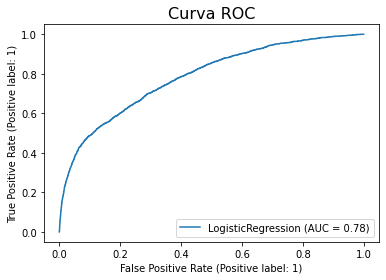

In [ ]:
# Graficar la curva ROC
curva_roc = metrics.RocCurveDisplay.from_estimator(reg_logistica, X_test, y_test)
plt.title('Curva ROC', fontsize=16)

## 2. Construya, por medio de tensorflow, una red neuronal profunda que trabaje con la AUC (Área bajo la curva ROC).

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=(10,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compilar la red
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2166 - auc: 0.7508
Epoch 2/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1920 - auc: 0.8150
Epoch 3/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1906 - auc: 0.8193
Epoch 4/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1902 - auc: 0.8209
Epoch 5/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1896 - auc: 0.8238
Epoch 6/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1896 - auc: 0.8230
Epoch 7/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1893 - auc: 0.8247
Epoch 8/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1892 - auc: 0.8252
Epoch 9/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1888 - auc: 0.8265
Epoch 10/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1887 - auc: 0.8263
Epoch 11/100
2400/2

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Precisión: %.2f' % (accuracy*100))
print('Pérdida: %.2f' % (loss*100))

3750/3750 [==============================] - 6s 2ms/step - loss: 0.1836 - auc: 0.8401
Precisión: 84.01
Pérdida: 18.36


## 3. Construya una red neuronal profunda con al menos 5 capas ocultas y gran número de neuronas en cada capa. Para evitar overfitting, utilice regularización en las capas ocultas (l1 o l2) y Dropout. Juegue con distintas tasas de regularización y comente los efectos sobre la métrica AUC .

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from numpy import loadtxt

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=(10,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                440       
                                                                 
 dense_1 (Dense)             (None, 60)                2460      
                                                                 
 dense_2 (Dense)             (None, 40)                2440      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,381
Trainable params: 6,381
Non-trainabl

In [ ]:
#compilar la red
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datos_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
2400/2400 [==============================] - 6s 2ms/step - loss: 0.2181 - accuracy: 0.9350
Epoch 2/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1914 - accuracy: 0.9363
Epoch 3/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1902 - accuracy: 0.9363
Epoch 4/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1902 - accuracy: 0.9364
Epoch 5/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1899 - accuracy: 0.9364
Epoch 6/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1895 - accuracy: 0.9364
Epoch 7/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1896 - accuracy: 0.9365
Epoch 8/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1891 - accuracy: 0.9365
Epoch 9/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1889 - accuracy: 0.9364
Epoch 10/100
2400/2400 [==============================] - 5s 2ms/step - l

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Precisión: %.2f' % (accuracy*100))
print('Pérdida: %.2f' % (loss*100))

3750/3750 [==============================] - 6s 1ms/step - loss: 0.1849 - accuracy: 0.9377
Precisión: 93.77
Pérdida: 18.49




<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-footer-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>

## 4. Para el modelo del punto 3, cálcule la métrica AUC a partir del Test Set. ¿Qué podemos decir acerca del grado de overfitting?

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=(10,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compilar la red
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [ ]:
model.fit(X_test, y_test, epochs=100, batch_size=50)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2598 - auc: 0.6349
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2077 - auc: 0.7695
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1958 - auc: 0.8060
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1928 - auc: 0.8161
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1920 - auc: 0.8186
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1911 - auc: 0.8189
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1913 - auc: 0.8198
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1908 - auc: 0.8216
Epoch 9/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1898 - auc: 0.8259
Epoch 10/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1897 - auc: 0.8259
Epoch 11/100
600/600 [=================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Precisión: %.2f' % (accuracy*100))
print('Pérdida: %.2f' % (loss*100))

938/938 [==============================] - 3s 3ms/step - loss: 0.1818 - auc: 0.8491
Precisión: 84.91
Pérdida: 18.18


Se puede concluir que el modelo funciona ya que el acurracy de los datos de entrenamiento vs los datos de prueba no tienen una brecha grande por lo que el overfitting no esta presente.